In [ ]:
#Importing neccesary library functions.
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,8)})

In [ ]:
#Defining the URL of both red and white wine CSV.
red_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

Loading the databases

In [ ]:
#Creating Pandas dataframe 
white_df = pd.read_csv(red_url, sep=';')
red_df = pd.read_csv(white_url,sep=';')

In [ ]:
#Info about the white wine database
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#Info about red wine database.
#Database shows absence of null values.
red_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


I have decided to take the red wine database because it has larger of the two.

Checking for the sum of NULL values

In [ ]:
#Double-checking for the presence of any null values in the database.
print(red_df.isna().sum().sort_values())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [ ]:
#printing the min, max, mean and standard deviation of all rows using "DESCRIBE" attribute of pandas.
print(red_df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000         

In [ ]:
#Printing random sample with 4 rows of the red-wine database.
red_df.sample(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2409,7.1,0.21,0.28,2.7,0.034,23.0,111.0,0.99405,3.35,0.64,10.2,4
2549,7.5,0.20,0.47,16.9,0.052,51.0,188.0,0.99944,3.09,0.62,9.3,5
4052,6.2,0.24,0.22,7.9,0.053,45.0,149.0,0.99545,3.23,0.52,9.3,5
1971,6.3,0.41,0.30,3.2,0.030,49.0,164.0,0.99270,3.53,0.79,11.7,7


In [ ]:
#Checking the column headers
red_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Replacing spaces from the column names to underscores for better readability.

In [ ]:
#Converting column string to lower and replacing space by "_" for uniformity.
red_df.columns = red_df.columns.str.lower().str.replace(" ", "_")

In [ ]:
#New column headers.
red_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [ ]:
#Checking if there is any value of quality is already set to zero or 1.
red_df["quality"].sort_values().value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [ ]:
#Creating a copy of the database for further processing.
red_df_new = red_df.copy()

In [ ]:
#Adding row called bin_quality to say 1 for quality greater than or equal to 7 and 0 otherwise. 
red_df_new['bin_quality'] = np.where(red_df_new['quality'] >= 7, 1, 0)

In [ ]:
# Checking if the quality vs bin_quality is assigned properly.
red_df_new[['quality','bin_quality']].sample(5)

,quality,bin_quality
120,5,0
3165,6,0
4332,8,1
2979,7,1
4524,6,0


In [ ]:
#Dropping the quality column so that bin_quality can further used for prediction.
red_df_new = red_df_new.drop(columns='quality')

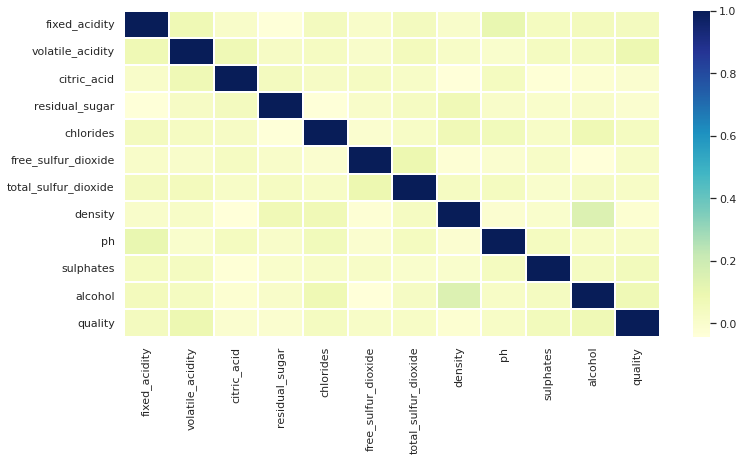

In [ ]:
#Checking the heat-map to see which parameter influences the quality more.
plt.figure(figsize=(12, 6))
corr = red_df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="YlGnBu")

Correlation Map does not indicate any clearly parameter influencing the quality of the wine.
Density and alcohol look more correlated.

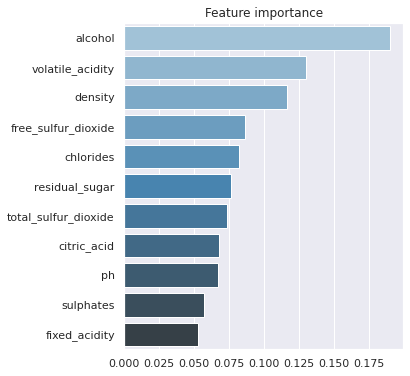

In [ ]:
#Checking feature importance.

#Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# One-hot encode
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
x, y = red_df.drop('quality',axis=1), red_df['quality']

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(5,6))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

From the above, we can conclude that alcohol, volatile acidity and density play vital role in determining the quality of the wine. However other features also play an role in determining the role determining the quality of the wine.

<Axes: xlabel='chlorides', ylabel='volatile_acidity'>

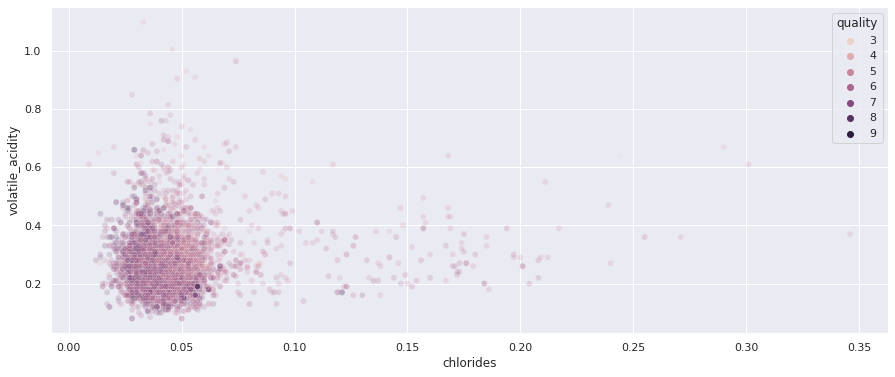

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=red_df, x="chlorides", y="volatile_acidity", hue="quality", alpha=.2)

The above scatter plot shows that major factors which determine quality has volatile acidity between range of 0 - 0.6 and chlorides ranges from 0.01 to 0.1.

<Axes: xlabel='fixed_acidity', ylabel='sulphates'>

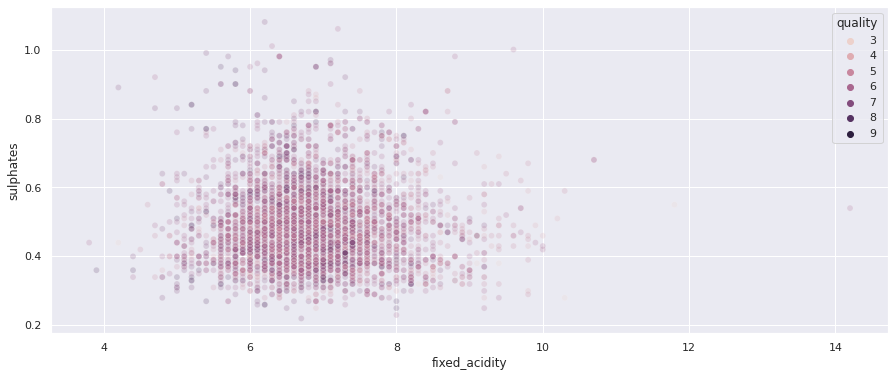

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(data=red_df, x="fixed_acidity", y="sulphates", hue="quality", alpha=.2)

The above scatter plot shows that major factors which determine quality has sulphates between range of 0.2 - 0.8and fixed acidity ranges from 5-9.

In [ ]:
# We can try to determine relationship between quality and some important features identified above.
red_df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality', 'bin_quality'],
      dtype='object')

In [ ]:
#Selecting specific columns
red_df_rp = red_df[['alcohol','volatile_acidity','density','free_sulfur_dioxide','chlorides','residual_sugar','quality']].copy()

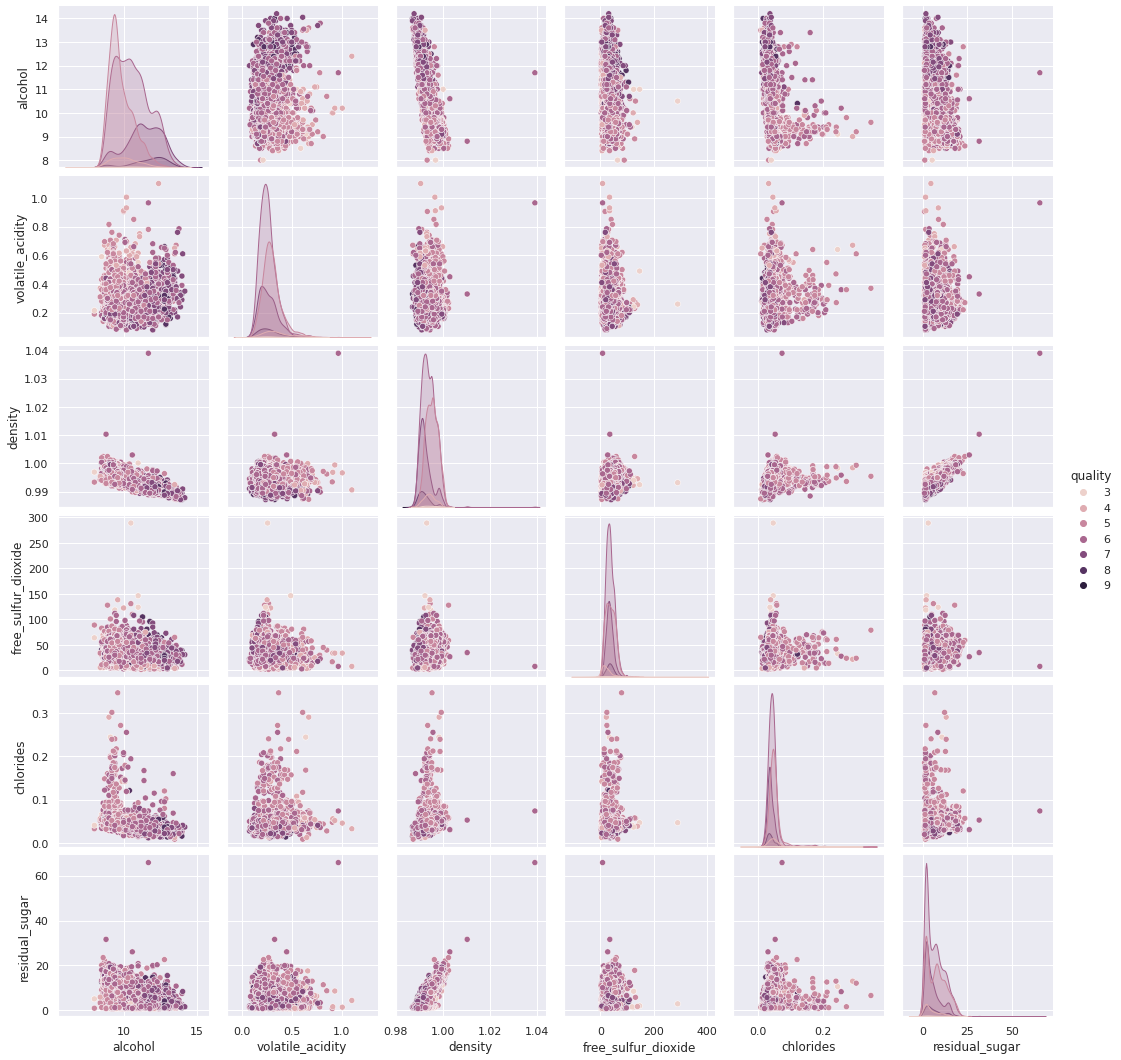

In [ ]:
sns.pairplot(red_df_rp, hue='quality', height=2.5);

The above scatter plots shows that quality is highly correlated to the selected features.

**LOGISTIC REGRESSION**

In [ ]:
# Selecting specific features from the entire list and creating new dataframe for further processing.
red_df_log = red_df_new[['alcohol','volatile_acidity','density','free_sulfur_dioxide','chlorides','residual_sugar','bin_quality']].copy()

In [ ]:
red_df_log.sample(4)

,alcohol,volatile_acidity,density,free_sulfur_dioxide,chlorides,residual_sugar,bin_quality
3658,10.8,0.275,0.99260,41.0,0.043,5.4,1
2309,9.8,0.280,0.99232,11.0,0.035,1.3,0
2342,12.3,0.400,0.99175,27.0,0.034,4.5,1
4768,9.6,0.270,0.99705,69.0,0.047,13.0,0


In [ ]:
#Checking the shape of new dataframe.
red_df_log.shape

(4898, 7)

In [ ]:
# Import LogisticRegression and train_test_split.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting the dataframes into X dataframe for analysis
X = red_df_log.drop('bin_quality', axis=1)
X.shape

(4898, 6)

In [ ]:
#Splitting the dataframes into X dataframe for analysis
y = red_df_log['bin_quality']
y.shape

(4898,)

In [ ]:
# Instantiate the model
logreg = LogisticRegression()

In [ ]:
# Split into training and test sets in ratio of 80:20.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=422)

In [ ]:
#Checking the shape of the y_test to ensure it is around 20% of the original dataframe.
y_test.shape

(980,)

In [ ]:
# Fit the model to the training dataset.
logreg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
#Predict the value of y with X_test dataset created.
y_pred = logreg.predict(X_test)


In [ ]:
# Test is added to check how many high quality wines are predicted.
test = X_test.join(y_test).reset_index()
test = test.join(pd.Series(y_pred, name='predicted'))
test.sample(10)

,index,alcohol,volatile_acidity,density,free_sulfur_dioxide,chlorides,residual_sugar,bin_quality,predicted
825,1814,12.8,0.420,0.99110,31.0,0.030,4.10,1,1
614,846,9.3,0.220,0.99845,62.0,0.035,15.40,0,0
737,3448,13.0,0.470,0.99056,29.0,0.034,4.75,1,1
967,2872,12.0,0.170,0.98999,93.0,0.029,1.80,1,1
335,2174,9.1,0.190,0.99860,48.5,0.053,12.80,1,0
689,3959,9.5,0.185,0.99438,36.0,0.048,7.10,0,0
344,4797,12.3,0.330,0.98970,28.0,0.043,1.40,0,0
605,4210,9.8,0.170,0.99390,26.0,0.050,6.00,0,0
8,4895,9.4,0.240,0.99254,30.0,0.041,1.20,0,0
388,935,8.9,0.270,0.99505,61.0,0.041,6.70,0,0


**DETERMING THE ACCURACY SCORE**

In [ ]:
#Determine the accuracy score of the predicted value by comparing it to y_test
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8275510204081633

In [ ]:
print("Accuracy Score:",accuracy_score(y_test, y_pred))

Accuracy Score: 0.8275510204081633


In [ ]:
#Determining the prediction probability of dataset with existing logistic regression for each feature selected.
y_pred_probs = logreg.predict_proba(X_test)[:, 1]
print(y_pred_probs[:10])

[0.16201947 0.22816905 0.26305729 0.29879414 0.12753903 0.12504816
 0.475799   0.62138291 0.06442943 0.45610729]


**DETERMING ROC AND AUC:**

In [ ]:
# Determining the ROC curve
# Import roc_curve
from sklearn.metrics import roc_curve

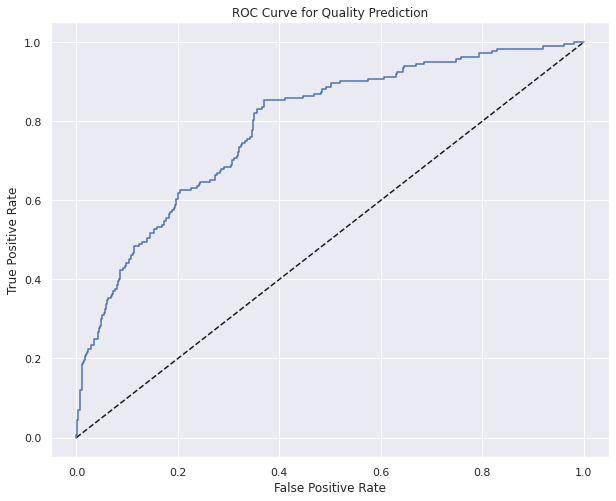

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Quality Prediction')
plt.show()

In [ ]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

In [ ]:
# Calculate roc_auc_score
print("ROC_AUC_Score:",roc_auc_score(y_test, y_pred_probs))


ROC_AUC_Score: 0.7868554730172602


**DETERMINING THE CONFUSION MATRIX AND CLASSFICATION REPORT**

In [ ]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[758  38]
 [131  53]]


In [ ]:
# Calculate the classification report.
# Recall.  : the ability of a classification model to identify all data points in a relevant class. 
# Precision: the ability of a classification model to return only the data points in a class. 
# F1 score : a single metric that combines recall and precision using the harmonic mean
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       796
           1       0.58      0.29      0.39       184

    accuracy                           0.83       980
   macro avg       0.72      0.62      0.64       980
weighted avg       0.80      0.83      0.80       980



**Summary:**
From the above, we can conclude that recall and precision of "0" is very high and recall and precision value of "1" is absymally low. This means that although accuracy is high (of 82.76%), it is not indicative of better prediction.

This is also due to presence of large subet of '0s' (poor quality - binary_quality column) in the dataframe.

In [ ]:
print("Model coefficients:    ", logreg.coef_)
print("Model intercept:", logreg.intercept_)

Model coefficients:     [[ 0.91756205 -3.08599505 -0.06637722  0.0084255  -1.32965207  0.03783798]]
Model intercept: [-10.73780339]


Model coefficients indicate how much the mean of the dependent variable (binary value of quality) changes with one unit change of independent variable (alcohol, volatile acidity, density etc) while holding all other variables constant.

"Alcohol" stands out as most important parameter which determines quality of the wine.

**DETERMINING MEAN ABSOLUTE ERROR AND RMSE**

In [ ]:
X.columns


Index(['alcohol', 'volatile_acidity', 'density', 'free_sulfur_dioxide',
       'chlorides', 'residual_sugar'],
      dtype='object')

In [ ]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 0.17244897959183675


In [ ]:
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared:", rmse)

Root Mean Squared: 0.41526976724996095


**HYPER-PARAMETER TUNING:**

In [ ]:
# Selecting the solver variable as hyper-parameter tuning.
params = {"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}


In [ ]:
# Instantiate the logistic regression model again with max_iteration set to 8000.
logreg_new = LogisticRegression(max_iter=8000)


In [ ]:
#Import GridSearch for walking through various solver variables and selecting the best one.
from sklearn.model_selection import GridSearchCV

In [ ]:
#Initialize the grid search with logistic regression and various values of "solver".
logreg_gs = GridSearchCV(logreg_new, params)

In [ ]:
#Fit the X and y training dataset to the logistic regression along with various hyper-parameters selected.
logreg_gs.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=8000),
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
#Determining the best score and value of the hyper-parameter which gives the best score.
print(logreg_gs.best_score_, "\n", logreg_gs.best_params_)

0.7894329762556362 
 {'solver': 'liblinear'}


The solver type - liblinear gives the best score of 0.7894

**Determining ACCURACY SCORE, MEAN ABSOLUTE ERROR, RMSE, ROC and AUC for the hyper-parameter tuned logistic regression.**

In [ ]:
# Capturing value of y predictions against the X_test database and comparing it against y_test for accuracy score.
y_pred_gs = logreg_gs.predict(X_test)
print("New Accuracy Score:",accuracy_score(y_test, y_pred_gs))

New Accuracy Score: 0.8255102040816327


In [ ]:
#Determining the ROC_AUC_Score for new regressions.
y_pred_probs_gs = logreg_gs.predict_proba(X_test)[:, 1]
print(y_pred_probs[:10])
print("ROC_AUC_Score:",roc_auc_score(y_test, y_pred_probs_gs))

[0.16201947 0.22816905 0.26305729 0.29879414 0.12753903 0.12504816
 0.475799   0.62138291 0.06442943 0.45610729]
ROC_AUC_Score: 0.7877157526764257


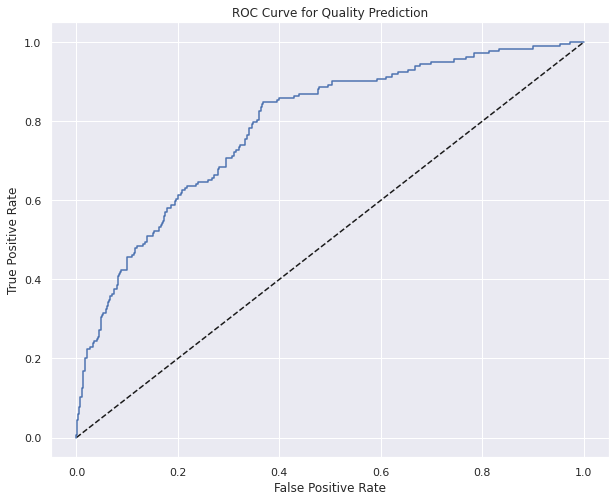

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_gs)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Quality Prediction')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       796
           1       0.58      0.24      0.34       184

    accuracy                           0.83       980
   macro avg       0.72      0.60      0.62       980
weighted avg       0.80      0.83      0.80       980



In [ ]:
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred_gs))
rmse = mean_squared_error(y_test, y_pred_gs, squared=False)
print("Root Mean Squared:", rmse)

Mean Absolute Error: 0.17448979591836736
Root Mean Squared: 0.4177197576346699


Comparing the logistic regression with hyper-parameter tuned logistic regression:

**Accuracy score:**

Logistic Regression = 0.8275

Hyper-parameter logistic regression = 0.8255 

**Mean Absolute Error:**

Logistic Regression = 0.1724

Hyper-parameter logistic regression = 0.1744

**RMSE:**

Logistic Regression = 0.4152

Hyper-parameter logistic regression = 0.4177


**Notes:**

The accuracy score, mean absolute error and RMSE have degraded with usage of hyper-parameter in the logistic regression.

We chose to use "solver" as the **ONLY** hyper-parameter and tried to see if it improved the accuracy, MAE and RMSE and from the results, we can conclude that we need additional or different hyper-parameter to evaluate our regression. 

The ideal process would be to choose different hyper-parameters available and see it improves accuracy and reduce MAE, RMSE. 

**Ways to improve the regression:**

(1) Choice of all the hyper-parameters for running GridSearch + Regression.

(2) Normalization of the values in the dataset. In our dataset, the mean of the parameters is high as 138.360657 (for total sulfur dioxide) and low as 0.04 (for chlorides) and they influence the quality of the wine. We can use some sort of "scaler" to solve this issue.

(3) Choice of 7 or high to mark as high quality of wine leads to lower subset (1060/4898) in the dataframe to indicate high quality. We should have larger dataset or change the value to 6 or high to indicate high quality wine, thus leading to proper distribution.